# Train Neural Network to Predict chess ratings

In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


Using TensorFlow backend.


Loading data from the file

In [2]:
def get_data(file_name):
    data = pd.read_csv(file_name)
    return data

In [3]:
data = get_data('data_new.csv')


In [4]:
ratings = list(data[' rating'])
age = list(data[' Age'])
name = data[' name']
# print name



In [5]:
import ast
try:
    rating_list = [ast.literal_eval(i) for i in ratings]
    age_list = [ast.literal_eval(i) for i in age]
except ValueError:
    print i

    
print rating_list[0]
print age_list[0]

[2107, 2107, 2107, 2109, 2109, 2109, 2111, 2111, 2111, 2102, 2104, 2086, 2106, 2110, 2110, 2110, 2110, 2110, 2110, 2112, 2123, 2113, 2104, 2094, 2094, 2094, 2094, 2094, 2094, 2098, 2098, 2102, 2110, 2110, 2102, 2105, 2105, 2105, 2105, 2105, 2105, 2105, 2095, 2098, 2098, 2107, 2097, 2104, 2104, 2104, 2092, 2089, 2075]
[589, 590, 591, 593, 594, 595, 597, 598, 599, 600, 601, 602, 603, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 621, 622, 623, 624, 625, 626, 627, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 641, 642, 643, 644, 645, 646, 647]


Normalize data

In [6]:
rating_list = np.array(rating_list)
age_list = np.array(age_list)
max_v = float(np.max(np.max(rating_list)))
max_a = float(np.max(np.max(age_list)))
print max_v
print max_a

2882.0
21769.0


In [7]:
# fix random seed for reproducibility
np.random.seed(7)

In [8]:
rating_list.shape

(284049,)

In [9]:
train_size = int(rating_list.shape[0] * 0.9)
val_size = int(rating_list.shape[0] * 0.05)
test_size = int(rating_list.shape[0] * 0.05)
print 'train_size= ',train_size,'\n','val_size= ',val_size,'\n','test_size= ',test_size

train_size=  255644 
val_size=  14202 
test_size=  14202


In [10]:
x_train = np.array([rating_list[:train_size],age_list[:train_size]])
x_val = np.array([rating_list[train_size:train_size+val_size],age_list[train_size:train_size+val_size]])
x_test = np.array([rating_list[-test_size:],age_list[-test_size:]])
print x_val.shape
print (x_train[1][:10])

(2, 14202)
[ list([589, 590, 591, 593, 594, 595, 597, 598, 599, 600, 601, 602, 603, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 621, 622, 623, 624, 625, 626, 627, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 641, 642, 643, 644, 645, 646, 647])
 list([889, 890, 891, 892, 893, 894, 895, 897, 898, 899, 900, 901, 902, 903, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 941, 942, 943, 944, 945, 946, 947])
 list([428, 429, 430, 431, 432, 433, 434, 435, 437, 438, 439, 440, 441, 442, 443])
 list([131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 149, 150, 151, 152, 153, 154, 155])
 list([555, 556, 557, 558, 559, 561, 562, 563, 564, 565, 566, 567, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601,

In [ ]:
batch_size = 1

model = Sequential()
layer1 = model.add(LSTM(5,return_sequences=True, batch_input_shape=(batch_size,1,2),stateful= True))
layer2 = model.add(LSTM(5,return_sequences=False, stateful= True))
layer4 = model.add(Dense(1))

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='mse',optimizer = adam,metrics=['accuracy'])
#model.fit(x_train, y_train_norm, epochs= 10, batch_size =batch_size, verbose = 2, shuffle=False, validation_data=(x_val,y_val_norm))


In [ ]:
print('Train...')
size =1000 #x_train.shape[1]
for epoch in range(10):

    mean_tr_acc = []
    mean_tr_loss = []
    for i in range(size):
        if i%10000==0:
            print i
#         print len(x_train[0][i])-1
        for j in range(len(x_train[0][i])-1):
            x_true = np.array([x_train[0][i][j]/max_v,x_train[1][i][j]/max_a])
            x_true = np.reshape(x_true,(1,1,2))
            y_true = np.array([x_train[0][i][j+1]/max_v])
#             print x_true,y_true
            tr_loss, tr_acc = model.train_on_batch(x_true,y_true)
            mean_tr_acc.append(tr_acc)
            mean_tr_loss.append(tr_loss)
        model.reset_states()
        
        #if i % 1000 == 0:
            #print epoch, i, np.mean(mean_tr_loss)
    
    print epoch, np.mean(mean_tr_loss)


    print('accuracy training = {}'.format(np.mean(mean_tr_acc)))
    print('loss training = {}'.format(np.mean(mean_tr_loss)))
    print('___________________________________')
    model.reset_states()



Train...
0
0 0.00257163
accuracy training = 0.0
loss training = 0.00257163448259
___________________________________
0
1 9.9074e-05
accuracy training = 0.0
loss training = 9.90740445559e-05
___________________________________
0
2 8.25002e-05
accuracy training = 0.0
loss training = 8.25001698104e-05
___________________________________
0


In [24]:
y_pred_list = []
y_train = []
for i in range(size):
#     print i,
    temp = []
    temp2 =[]
    for j in range(len(x_train[0][i])-1):
        x_true = np.array([x_train[0][i][j]/max_v,x_train[1][i][j]/max_a])
        x_true = np.reshape(x_true,(1,1,2))
        y_true = np.array([x_train[0][i][j+1]/max_v])
        y_pred = model.predict_on_batch(x_true)

        
        temp.append(y_pred[0][0]*max_v)
        temp2.append(y_true[0]*max_v)
#     print temp
    y_pred_list.append(temp)
    y_train.append(temp2)



In [25]:
print np.array(y_pred_list).shape

(1000,)


In [26]:
print y_pred_list[0], y_train[0]

[2119.8322138786316, 2096.1512293815613, 2112.0091542005539, 2107.5976569652557, 2111.0765573978424, 2109.8036632537842, 2112.7600071430206, 2111.7933977842331, 2112.5119559764862, 2103.2093501091003, 2108.3655161857605, 2087.654618024826, 2114.7944046258926, 2107.7460753917694, 2112.768080830574, 2110.6941738128662, 2112.0151665210724, 2111.4690760374069, 2111.8356558084488, 2113.7041132450104, 2124.1615999937057, 2111.1195025444031, 2107.6203320026398, 2097.5771800279617, 2100.2347974777222, 2098.0786075592041, 2098.8215585947037, 2098.2648177146912, 2098.4455308914185, 2102.237930893898, 2101.0339207649231, 2105.7946479320526, 2112.1220140457153, 2110.7048242092133, 2104.1020938158035, 2109.1464307308197, 2106.8395892381668, 2108.0686793327332, 2107.4713982343674, 2107.8072292804718, 2107.6601850986481, 2107.7601613998413, 2097.9470236301422, 2103.9715405702591, 2100.9212327003479, 2111.2000676393509, 2097.8853543996811, 2110.0731869935989, 2104.8577566146851, 2107.7866156101227, 20

In [27]:
y_predict = np.array(y_pred_list)
y_train = np.array(y_train)
error = 0
length = 0
for i in range(y_train.shape[0]):
    temp = np.zeros(len(y_train[i]))
    temp = abs(np.array(y_train[i])-np.array(y_predict[i]))/np.array(y_train[i])
    error += np.sum(temp)
    length += temp.shape[0] 
    
percentage_error = error/(length)

print (error)
print length 
print percentage_error

434.812064717
35674
0.0121884864248


0.0121884864248


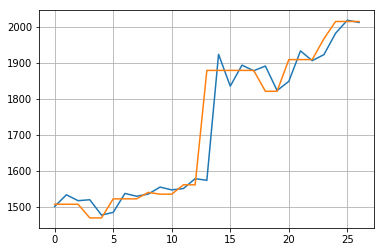

In [28]:
print percentage_error
# print y_predict
m=200
plt.plot(np.array(y_predict[m]))
plt.plot(np.array(y_train[m]))
plt.grid()
plt.show()

In [29]:
print("Accuracy:",(1-percentage_error)*100)

('Accuracy:', 98.781151357524351)


In [30]:
print "...........test............"
ytest_pred_list = []
y_test = []
for i in range(100):
    temp = []
    temp2 =[]
    for j in range(len(x_test[0][i])-1):
        x_true = np.array([x_test[0][i][j]/max_v,x_test[1][i][j]/max_a])
        x_true = np.reshape(x_true,(1,1,2))
        y_true = np.array([x_test[0][i][j+1]/max_v])
        y_pred = model.predict_on_batch(x_true)

        
        temp.append(y_pred[0][0]*max_v)
        temp2.append(y_true[0]*max_v)
#     print temp
    ytest_pred_list.append(temp)
    y_test.append(temp2)
#     model.reset_states()

...........test............


In [31]:
ytest_predict = np.array(ytest_pred_list)
y_test = np.array(y_test)
error = 0
length = 0
for i in range(y_test.shape[0]):
    temp = np.zeros(len(y_test[i]))
    temp = abs(np.array(y_test[i])-np.array(ytest_predict[i]))/np.array(y_test[i])
    error += np.sum(temp)
    length += temp.shape[0] 
    
test_error = error/(length)

print (error)
print length 
print test_error

40.3704910485
4156
0.00971378514159


In [32]:
n = 3
print("Test Accuracy:",(1-test_error)*100)
# print y_predict
plt.plot(np.array(ytest_predict[n]))
plt.plot(np.array(y_test[n]))
plt.grid()
plt.show()

('Test Accuracy:', 99.028621485840532)


In [33]:
print(x_test[0][8] , y_test[8])

([1057, 1057, 1162, 1162, 1162, 1238, 1237, 1236, 1236, 1236, 1403, 1401, 1391, 1391, 1391, 1391, 1391, 1391, 1452, 1497, 1497, 1485, 1568, 1517, 1517, 1517, 1517, 1517], [1057.0, 1162.0, 1162.0, 1162.0, 1238.0, 1237.0, 1236.0, 1236.0, 1236.0, 1403.0, 1401.0, 1391.0, 1391.0, 1391.0, 1391.0, 1391.0, 1391.0, 1451.9999999999998, 1497.0, 1497.0, 1485.0, 1568.0000000000002, 1517.0, 1517.0, 1517.0, 1517.0, 1517.0])


In [34]:
print ytest_predict[8]

[1116.8526963591576, 1148.205573618412, 1183.4777108430862, 1182.4161927103996, 1186.7443763613701, 1244.8076746463776, 1247.8734427690506, 1250.5456615686417, 1250.225977897644, 1250.1729835867882, 1397.3093256950378, 1396.2489241361618, 1396.9750406742096, 1397.9562513828278, 1398.4545868635178, 1399.0180271863937, 1399.4853562712669, 1399.8949670791626, 1462.2451357841492, 1503.4461940526962, 1502.8703855276108, 1494.9971659183502, 1584.7305343151093, 1514.8474433422089, 1536.8271129131317, 1530.1403818130493, 1532.159662604332]
